## Assignment 3 - Prediction with Machine Learning for Economists

### Amirhooshang Navei - CEU, Fall 2023

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


### Import Data

In [2]:
df = pd.read_csv(r'C:\Users\PA\Documents\Austria\CEU\3rd Semester\Prediction\Git\DA3-phdma\HW3\Data Cleaning- Prep code\cs_bisnode_panel.csv')

df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


In [3]:
df.shape

(287829, 48)

In [4]:
# checking for how many observations the "year"==2012
df[df['year']==2012].shape

(28469, 48)

In [5]:
df[df['year']==2013].shape, df[df['year']==2014].shape

((28474, 48), (28151, 48))

In [6]:
# checking for the missing values in each column
df.isnull().sum()

# sorting the missing values in descending order
df.isnull().sum().sort_values(ascending=False)

D                       287829
finished_prod           270344
wages                   269846
COGS                    269572
net_exp_sales           269572
net_dom_sales           269572
exit_year               248970
exit_date               231649
labor_avg               146532
birth_year              111818
founded_year             56457
origin                   56427
female                   56427
ceo_count                56427
foreign                  56427
inoffice_days            56427
gender                   56427
extra_exp                18529
extra_inc                18529
extra_profit_loss        17203
profit_loss_year          9884
ind                       9769
material_exp              8040
personnel_exp             8040
amort                     8040
sales                     7437
inc_bef_tax               7437
tang_assets               1470
nace_main                 1038
ind2                      1038
region_m                   840
intang_assets              140
fixed_as

In [7]:
# only keeping the observations with year==2012 or year==2013
df_2 = df[df['year'].isin([2010, 2011, 2012, 2013, 2014, 2015])]

In [8]:
df_2.shape

(167606, 48)

### Dropping the columns with many missing values

In [9]:
# checking the missing values in each column
df_2.isnull().sum()

# sorting the missing values in descending order
df_2.isnull().sum().sort_values(ascending=False)

D                       167606
finished_prod           158855
wages                   158707
COGS                    158556
net_exp_sales           158556
net_dom_sales           158556
exit_year               150648
exit_date               147067
labor_avg                53346
birth_year               43221
founded_year             18409
gender                   18403
inoffice_days            18403
ceo_count                18403
foreign                  18403
origin                   18403
female                   18403
ind                       4966
amort                     4117
personnel_exp             4117
material_exp              4117
extra_profit_loss         3755
extra_inc                 3751
extra_exp                 3751
sales                     3742
inc_bef_tax               3742
region_m                   459
profit_loss_year            67
nace_main                   59
ind2                        59
tang_assets                 57
inventories                 57
curr_lia

In [10]:
# dropping the columns with many missing values
df_2 = df_2.drop(['D', 'COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages'], axis=1)

### Stacking- Unstacking

In [11]:
# Copying from the book's code: # add all missing year and comp_id combinations -

df_2 = (
    df_2.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
df_2 = df_2.replace("toReplace", np.nan)

In [12]:
# sorting the df_2 by comp_id and year
df_2 = df_2.sort_values(['comp_id', 'year'])

In [13]:
df_2.head()

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,2010,1001034.0,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333
39375,2011,1001034.0,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333
78750,2012,1001034.0,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333
118125,2013,1001034.0,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN
157500,2014,1001034.0,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN


### Define a new variable: profit_growth

In [14]:
# generating the "profit_growth": Growth rate of profit_loss_year compared to the previous year
df_2['profit_growth'] = df_2['profit_loss_year'].div(df_2['profit_loss_year'].shift(1))-1

In [15]:
df_2.head()

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,profit_growth
0,2010,1001034.0,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,NaN
39375,2011,1001034.0,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,-0.791953
78750,2012,1001034.0,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,0.575472
118125,2013,1001034.0,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN,-0.744012
157500,2014,1001034.0,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN,-0.292398


In [16]:
# shifting the "profit_growth" column by -1
df_2['profit_growth'] = df_2['profit_growth'].shift(-1)

In [17]:
df_2.head()

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,profit_growth
0,2010,1001034.0,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,-0.791953
39375,2011,1001034.0,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,0.575472
78750,2012,1001034.0,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,-0.744012
118125,2013,1001034.0,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN,-0.292398
157500,2014,1001034.0,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN,0.239669


# Define the binary Target Variable

In [18]:
# defining a new variable, "fast_growth", which is equal to 1 if the "profit_growth" is greater than 0.3, year==2012, and "profit_loss_year" is greater than 0, otherwise 0
df_2['fast_growth'] = np.where((df_2['profit_growth']>0.3) & (df_2['year']==2012) & (df_2['profit_loss_year']>0), 1, 0)


In [19]:
df_2.head()

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,profit_growth,fast_growth
0,2010,1001034.0,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,...,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,-0.791953,0
39375,2011,1001034.0,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,...,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,0.575472,0
78750,2012,1001034.0,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,...,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,-0.744012,0
118125,2013,1001034.0,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,...,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN,-0.292398,0
157500,2014,1001034.0,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,...,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,NaN,0.239669,0


In [20]:
# checking the "profit_loss_year" for the second observation
df_2['profit_loss_year'].iloc[1]

-1570.370361328125

In [21]:
# checking the statistics of the "fast_growth" variable
df_2['fast_growth'].describe()


count    236250.000000
mean          0.015374
std           0.123034
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: fast_growth, dtype: float64

In [22]:
# dropping the observations with year != 2012
df_2012 = df_2[df_2['year']==2012]

In [23]:
df_2012.shape

(39375, 44)

In [24]:
df_2012['fast_growth'].describe()

count    39375.000000
mean         0.092241
std          0.289370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fast_growth, dtype: float64

In [25]:
# Dropping the observations with missing values in the "profit_loss_year" variable
df_2012 = df_2012.dropna(subset=['profit_loss_year'])

In [26]:
df_2012.shape

(28449, 44)

([<matplotlib.axis.XTick at 0x28986206530>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

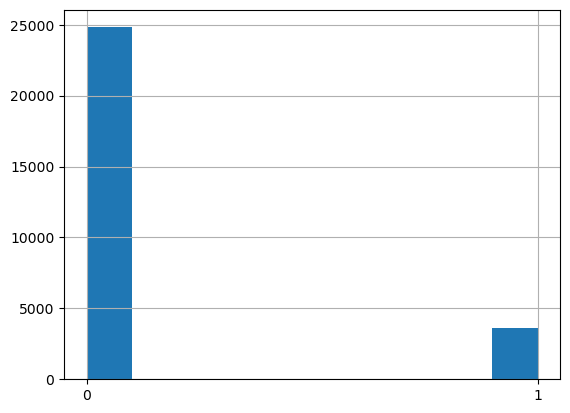

In [27]:
# plotting the histogram of the "fast_growth" variable considering it is a binary variable
df_2012['fast_growth'].hist()
# setting the xticks to be 0 and 1
plt.xticks([0,1])

In [28]:
# checking the ratio of 1s to all values in the "fast_growth" variable
df_2012['fast_growth'].value_counts(normalize=True)


0    0.872333
1    0.127667
Name: fast_growth, dtype: float64

In [29]:
# checking the missing values in each column
df_2012.isnull().sum()

# sorting the missing values in descending order
df_2012.isnull().sum().sort_values(ascending=False)

exit_year               25052
exit_date               24485
birth_year               7653
labor_avg                7061
profit_growth            3574
founded_year             3184
gender                   3182
inoffice_days            3182
ceo_count                3182
female                   3182
foreign                  3182
origin                   3182
material_exp             1092
personnel_exp            1092
amort                    1092
inc_bef_tax              1023
extra_profit_loss        1023
extra_inc                1023
extra_exp                1023
sales                    1023
ind                       854
region_m                   78
nace_main                   6
ind2                        6
founded_date                3
urban_m                     0
year                        0
balsheet_flag               0
balsheet_notfullyear        0
balsheet_length             0
comp_id                     0
tang_assets                 0
subscribed_cap              0
share_eq  

In [30]:
# check if for any observation "exit_year" is smaller than "year"
sum(df_2012['exit_year']<df_2012['year'])

4

In [31]:
# dropping the observations with "exit_year" smaller than "year"
df_2012 = df_2012.drop(df_2012[df_2012['exit_year']<df_2012['year']].index)

In [32]:
df_2012.shape

(28445, 44)

In [33]:
df_2012.head()

,year,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,profit_growth,fast_growth
78750,2012,1001034.0,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,...,5630.0,56.0,3.0,1.0,Central,1990-11-19,NaN,0.083333,-0.744012,0
78751,2012,1001541.0,2012-01-01,2012-12-31,481.481476,9629.629883,1303.703735,0.0,0.0,0.0,...,5610.0,56.0,3.0,3.0,Central,2008-02-24,NaN,NaN,-1.113189,0
78752,2012,1002029.0,2012-01-01,2012-12-31,14929.629883,203885.187500,120444.453125,0.0,0.0,0.0,...,2711.0,27.0,2.0,3.0,East,2006-07-03,NaN,0.458333,0.211428,0
78753,2012,1003200.0,2012-01-01,2012-12-31,25.925926,22.222221,10996.295898,0.0,0.0,0.0,...,5630.0,56.0,3.0,1.0,Central,2003-10-21,2014-08-09,NaN,NaN,0
78756,2012,1007261.0,2012-01-01,2012-12-31,0.000000,255.555557,9207.407227,0.0,0.0,0.0,...,5610.0,56.0,3.0,1.0,Central,2010-08-26,2015-11-19,0.083333,NaN,0


In [34]:
# checking the values of the "exit_year" variable
df_2012['exit_year'].value_counts()

2016.0    1407
2015.0    1131
2014.0     489
2013.0     240
2017.0      66
2012.0      60
Name: exit_year, dtype: int64

In [35]:
# dropping the "exit_year" and "exit_date" variables
df_2012 = df_2012.drop(['exit_year', 'exit_date'], axis=1)

<Axes: >

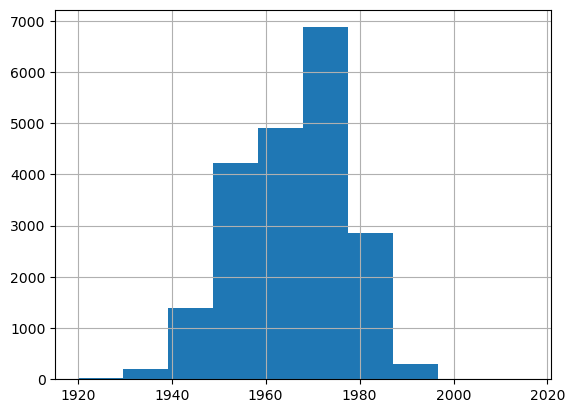

In [36]:
# checking the distribution of "birth_year"
df_2012['birth_year'].hist()

In [37]:
# checking the statistics of "birth_year"
df_2012['birth_year'].describe()

count    20793.000000
mean      1965.760653
std         11.514953
min       1920.000000
25%       1957.000000
50%       1967.000000
75%       1975.000000
max       2016.000000
Name: birth_year, dtype: float64

In [38]:
# replacing the missing values in "birth_year" with the median
# adding a flag variable to indicate the missing values
df_2012['birth_year_missing'] = np.where(df_2012['birth_year'].isnull(), 1, 0)
df_2012['birth_year'] = df_2012['birth_year'].fillna(df_2012['birth_year'].median())

In [39]:
# adding a flag variable to indicate the missing values for "labor_avg" and filling the missing values with the average
df_2012['labor_avg_missing'] = np.where(df_2012['labor_avg'].isnull(), 1, 0)
df_2012['labor_avg'] = df_2012['labor_avg'].fillna(df_2012['labor_avg'].mean())

<Axes: >

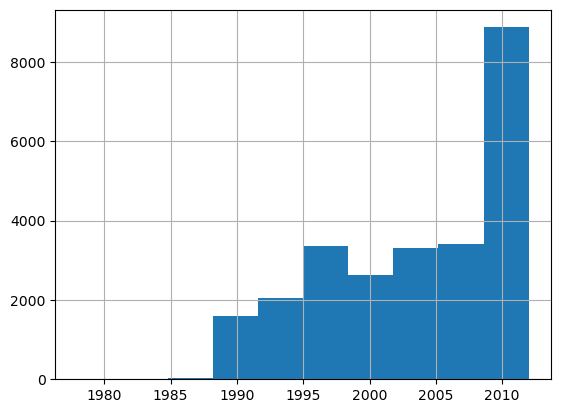

In [40]:
# Checking the distribution of "founded_year"
df_2012['founded_year'].hist()

In [41]:
# checking the statistics of "founded_year"
df_2012['founded_year'].describe()

count    25261.000000
mean      2003.453466
std          6.898892
min       1978.000000
25%       1998.000000
50%       2005.000000
75%       2010.000000
max       2012.000000
Name: founded_year, dtype: float64

In [42]:
# replacing the missing values in "founded_year" with the median and adding a flag variable to indicate the missing values
df_2012['founded_year_missing'] = np.where(df_2012['founded_year'].isnull(), 1, 0)
df_2012['founded_year'] = df_2012['founded_year'].fillna(df_2012['founded_year'].median())

<Axes: >

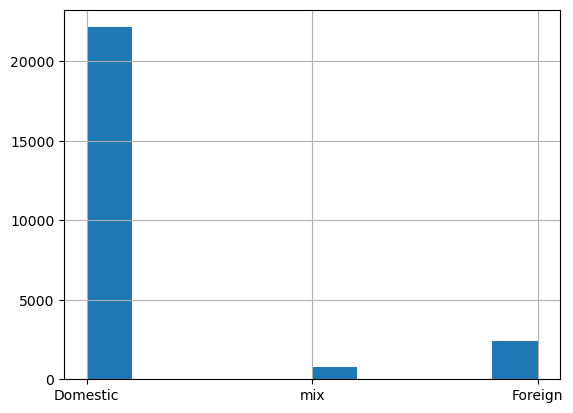

In [43]:
# checking the distribution of "origin"
df_2012['origin'].hist()

In [44]:
# checking the statistics of "origin"
df_2012['origin'].describe()

count        25263
unique           3
top       Domestic
freq         22135
Name: origin, dtype: object

In [45]:
# replacing the missing values in "origin" with the mode and adding a flag variable to indicate the missing values
df_2012['origin_missing'] = np.where(df_2012['origin'].isnull(), 1, 0)
df_2012['origin'] = df_2012['origin'].fillna(df_2012['origin'].mode()[0])

In [46]:
# checking the missing values in each column
df_2012.isnull().sum()

# sorting the missing values in descending order
df_2012.isnull().sum().sort_values(ascending=False)

profit_growth           3572
foreign                 3182
ceo_count               3182
inoffice_days           3182
gender                  3182
female                  3182
material_exp            1091
amort                   1091
personnel_exp           1091
extra_exp               1022
extra_inc               1022
extra_profit_loss       1022
inc_bef_tax             1022
sales                   1022
ind                      854
region_m                  78
ind2                       6
nace_main                  6
founded_date               3
urban_m                    0
labor_avg                  0
fast_growth                0
origin                     0
birth_year_missing         0
labor_avg_missing          0
birth_year                 0
founded_year_missing       0
year                       0
balsheet_length            0
founded_year               0
inventories                0
begin                      0
end                        0
curr_assets                0
curr_liab     

In [47]:
# Drop the observations with missing values in the "profit_growth" variable
df_2012 = df_2012.dropna(subset=['profit_growth'])

In [48]:
# checking the missing values in each column
df_2012.isnull().sum()

# sorting the missing values in descending order
df_2012.isnull().sum().sort_values(ascending=False)

foreign                 2618
female                  2618
ceo_count               2618
inoffice_days           2618
gender                  2618
ind                      770
amort                    428
personnel_exp            428
material_exp             428
extra_exp                372
extra_inc                372
extra_profit_loss        372
sales                    372
inc_bef_tax              372
region_m                  66
ind2                       6
nace_main                  6
founded_date               2
labor_avg                  0
urban_m                    0
profit_growth              0
fast_growth                0
origin                     0
birth_year_missing         0
labor_avg_missing          0
birth_year                 0
founded_year_missing       0
year                       0
balsheet_length            0
founded_year               0
inventories                0
begin                      0
end                        0
curr_assets                0
curr_liab     

In [49]:
df_2012.shape

(24873, 46)

<Axes: >

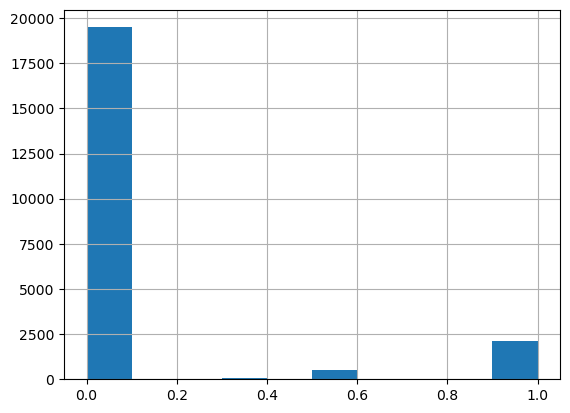

In [50]:
# checking the distribution of "foreign"
df_2012['foreign'].hist()

In [51]:
# create a flag variable to indicate the missing values for "foreign" and fill the missing values with the mode
df_2012['foreign_missing'] = np.where(df_2012['foreign'].isnull(), 1, 0)
df_2012['foreign'] = df_2012['foreign'].fillna(df_2012['foreign'].mode()[0])

<Axes: >

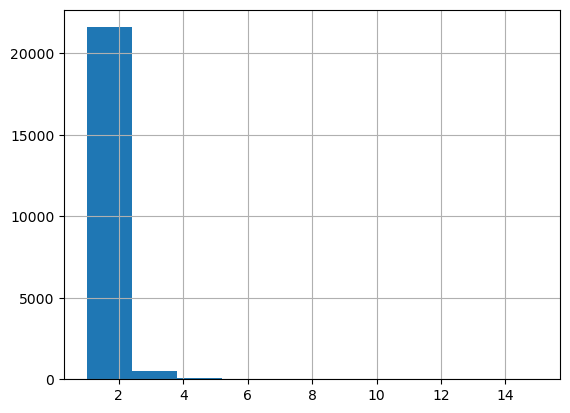

In [52]:
# checking the distribution of "ceo_count"
df_2012['ceo_count'].hist()

In [53]:
# create a flag variable to indicate the missing values for "ceo_count" and fill the missing values with the mode
df_2012['ceo_count_missing'] = np.where(df_2012['ceo_count'].isnull(), 1, 0)
df_2012['ceo_count'] = df_2012['ceo_count'].fillna(df_2012['ceo_count'].mode()[0])

<Axes: >

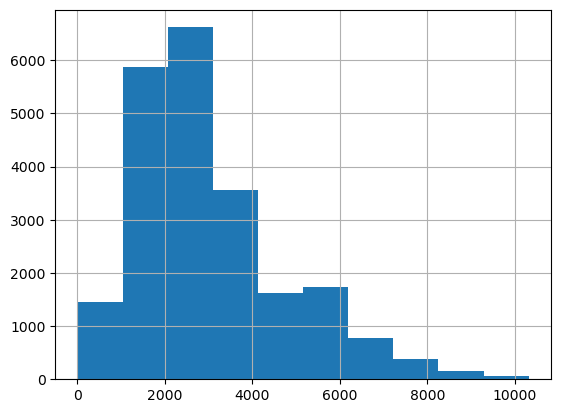

In [54]:
# checking the distribution of "inoffice_days"
df_2012['inoffice_days'].hist()

In [55]:
# create a flag variable to indicate the missing values for "inoffice_days" and fill the missing values with the mean
df_2012['inoffice_days_missing'] = np.where(df_2012['inoffice_days'].isnull(), 1, 0)
df_2012['inoffice_days'] = df_2012['inoffice_days'].fillna(df_2012['inoffice_days'].mean())

<Axes: >

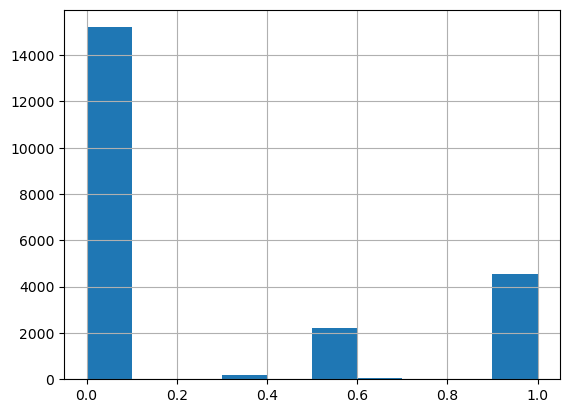

In [56]:
# checking the distribution of "female"
df_2012['female'].hist()

In [57]:
# create a flag variable for missing values of "female" and fill the missing values with the mean
df_2012['female_missing'] = np.where(df_2012['female'].isnull(), 1, 0)
df_2012['female'] = df_2012['female'].fillna(df_2012['female'].mean())

<Axes: >

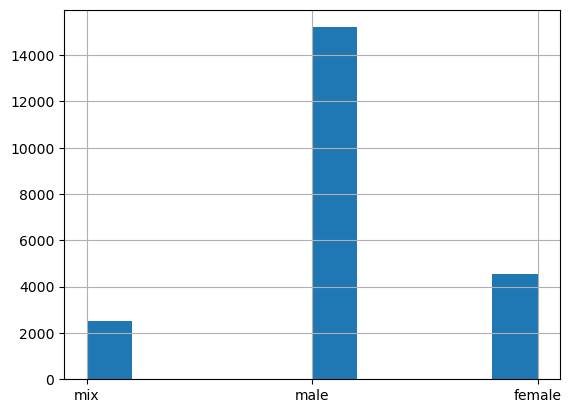

In [58]:
# checking the distribution of "gender"
df_2012['gender'].hist()

In [59]:
# create a flag variable for missing values of "gender"
df_2012["gender_missing"] = np.where(df_2012['gender'].isnull(), 1, 0)

# filling the missing values based on "female"
df_2012.loc[df_2012['female'] == 1, 'gender'] = 'female' 
df_2012.loc[(df_2012['female'] > 0) & (df_2012['female'] < 1), 'gender'] = 'mix' 
df_2012.loc[df_2012['female'] == 0, 'gender'] = 'male'

In [60]:
# saving the new dataset in a csv file
df_2012.to_csv('cs_bisnode_panel_clean.0.csv', index=False)

## Dropping the missing observations

In [61]:
# dropping the observations with missing values in "liq_assets", "fixed_assets", "curr_assets", "inc_bef_tax", "profit_loss_year", "tang_assets"
df_2012 = df_2012.dropna(subset=['liq_assets', 'fixed_assets', 'curr_assets', 'inc_bef_tax', 'profit_loss_year', 'tang_assets', 'ind'])

In [62]:
# checking the missing values in each column
df_2012.isnull().sum()

# sorting the missing values in descending order
df_2012.isnull().sum().sort_values(ascending=False)

region_m                 64
amort                    54
personnel_exp            54
material_exp             54
founded_date              2
year                      0
birth_year                0
inoffice_days             0
gender                    0
origin                    0
nace_main                 0
ind2                      0
ind                       0
urban_m                   0
labor_avg                 0
foreign                   0
profit_growth             0
fast_growth               0
birth_year_missing        0
labor_avg_missing         0
founded_year_missing      0
origin_missing            0
foreign_missing           0
ceo_count_missing         0
inoffice_days_missing     0
female_missing            0
female                    0
founded_year              0
ceo_count                 0
intang_assets             0
begin                     0
end                       0
curr_assets               0
curr_liab                 0
extra_exp                 0
extra_inc           

In [63]:
df_2012.shape

(23748, 51)

In [64]:
# dropping the observations with missing values
df_2012 = df_2012.dropna() 

<Axes: >

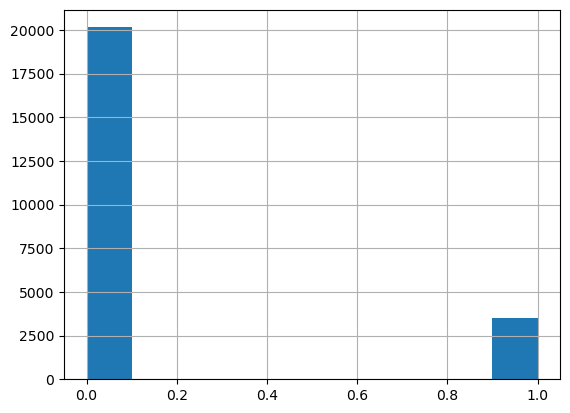

In [65]:
# checking the distribution of "fast_growth"
df_2012['fast_growth'].hist()

### Feature Engineering

In [66]:
# creating a flag variable for negative values of "sales"
df_2012['sales_neg'] = np.where(df_2012['sales']<0, 1, 0)

# replacing the negative values of "sales" with 1
df_2012['sales'] = df_2012['sales'].mask(df_2012['sales']<0, 1)

c:\Users\PA\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

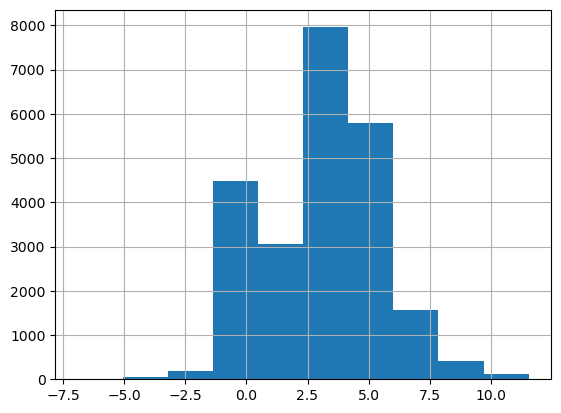

In [67]:
# define "sales_mil" as "sales" divided by 1,000,
df_2012['sales_mil'] = df_2012['sales'].div(1000)

# define "sales_mil_log" as the log of "sales_mil" if "sales_mil" is greater than 0, otherwise 0
df_2012['sales_mil_log'] = np.where(df_2012['sales_mil']>0, np.log(df_2012['sales_mil']), 0)

# checking the distribution of "sales_mil_log"
df_2012['sales_mil_log'].hist()

In [68]:
# define the "age" = "year" - "founded_year"
df_2012['age'] = df_2012['year'] - df_2012['founded_year']

# define the "new" = 1 if "age" is smaller-equal than 1, otherwise 0
df_2012['new'] = np.where(df_2012['age']<=1, 1, 0)



In [69]:
# dropping the observations with "sales">10000000 or "sales"<1000
df_2012 = df_2012.drop(df_2012[(df_2012['sales']>10000000) | (df_2012['sales']<1000)].index)


In [70]:
df_2012.shape

(19119, 56)

### cat for ind2

In [71]:
df_2012["ind2_cat"] = df_2012["ind2"].copy()
df_2012["ind2_cat"] = np.where(df_2012["ind2"] > 56, 60, df_2012["ind2_cat"])
df_2012["ind2_cat"] = np.where(df_2012["ind2"] < 26, 20, df_2012["ind2_cat"])
df_2012["ind2_cat"] = np.where(
    (df_2012["ind2"] < 55) & (df_2012["ind2"] > 35), 40, df_2012["ind2_cat"]
)
df_2012["ind2_cat"] = np.where(df_2012["ind2"] == 31, 30, df_2012["ind2_cat"])
df_2012["ind2_cat"] = np.where(df_2012["ind2"].isna(), 99, df_2012["ind2_cat"])

In [72]:
df_2012.groupby("ind2_cat").count()["comp_id"]

ind2_cat
26.0      992
27.0      607
28.0     1781
29.0      257
30.0      156
33.0     1773
55.0     2141
56.0    11412
Name: comp_id, dtype: int64

In [73]:
# define "age_sq" = "age" squared
df_2012["age_sq"] = df_2012["age"] ** 2

# define "foreign_management" as a categorical variable
df_2012["foreign_management"] = np.where(
    df_2012["foreign"] >= 0.5, 1, np.where(df_2012["foreign"].isna(), np.nan, 0)
)

In [74]:
# create a flag variable, "flag_asset_problem" for negative values of "intang_assets", "curr_assets", "fixed_assets"
df_2012["flag_asset_problem"] = np.where(
    (df_2012["intang_assets"] < 0)
    | (df_2012["curr_assets"] < 0)
    | (df_2012["fixed_assets"] < 0),
    1,
    0,
)

# changing the negative values of "intang_assets", "curr_assets", "fixed_assets" to 0
df_2012["intang_assets"] = np.where(df_2012["intang_assets"] < 0, 0, df_2012["intang_assets"])
df_2012["curr_assets"] = np.where(df_2012["curr_assets"] < 0, 0, df_2012["curr_assets"])
df_2012["fixed_assets"] = np.where(df_2012["fixed_assets"] < 0, 0, df_2012["fixed_assets"])


In [75]:
# define "total_assets" = "intang_assets" + "curr_assets" + "fixed_assets"
df_2012["total_assets"] = (
    df_2012["intang_assets"] + df_2012["curr_assets"] + df_2012["fixed_assets"]
)

In [76]:
# profit-loss variables:
pl_names = [
    "extra_exp",
    "extra_inc",
    "extra_profit_loss",
    "inc_bef_tax",
    "inventories",
    "material_exp",
    "profit_loss_year",
    "personnel_exp",
]

# balance sheet variables:
bs_names = [
    "intang_assets",
    "curr_liab",
    "fixed_assets",
    "liq_assets",
    "curr_assets",
    "share_eq",
    "subscribed_cap",
    "tang_assets",
]

In [77]:
# normalizing the profit-loss variables by "sales" and saving them in new columns
for i in pl_names:
    df_2012[i + "/sales"] = df_2012[i] / df_2012["sales"]

# normalizing the balance sheet variables by "total_assets" and saving them in new columns
for i in bs_names:
    df_2012[i + "/total_assets"] = df_2012[i] / df_2012["total_assets"]

In [78]:
# list of variables that should be between -1 and 1
var_list = [
    "extra_profit_loss/sales",
    "inc_bef_tax/sales",
    "profit_loss_year/sales",
    "share_eq/total_assets",
]

# create a "_flag_low" variable for the variables in "var_list" that are smaller than -1
for i in var_list:
    df_2012[i + "_flag_low"] = np.where(df_2012[i] < -1, 1, 0)

# replace the values smaller than -1 with -1
for i in var_list:
    df_2012[i] = np.where(df_2012[i] < -1, -1, df_2012[i])

# create a "_flag_high" variable for the variables in "var_list" that are greater than 1
for i in var_list:
    df_2012[i + "_flag_high"] = np.where(df_2012[i] > 1, 1, 0)

# replace the values greater than 1 with 1
for i in var_list:
    df_2012[i] = np.where(df_2012[i] > 1, 1, df_2012[i])

# adding the quadratic terms of the variables in "var_list"
for i in var_list:
    df_2012[i + "_sq"] = df_2012[i] ** 2

In [79]:
# a list of flag variables if "missing" or "flag" is in the variable name
flag_list = [i for i in df_2012.columns if ("missing" in i) | ("flag" in i)]

flag_list


['balsheet_flag',
 'birth_year_missing',
 'labor_avg_missing',
 'founded_year_missing',
 'origin_missing',
 'foreign_missing',
 'ceo_count_missing',
 'inoffice_days_missing',
 'female_missing',
 'gender_missing',
 'flag_asset_problem',
 'extra_profit_loss/sales_flag_low',
 'inc_bef_tax/sales_flag_low',
 'profit_loss_year/sales_flag_low',
 'share_eq/total_assets_flag_low',
 'extra_profit_loss/sales_flag_high',
 'inc_bef_tax/sales_flag_high',
 'profit_loss_year/sales_flag_high',
 'share_eq/total_assets_flag_high']

In [80]:
# dropping the flag variables with no variation
for i in flag_list:
    if df_2012[i].nunique() == 1:
        df_2012 = df_2012.drop(i, axis=1)

In [81]:
# define the "ceo_age" = "year" - "birth_year"
df_2012["ceo_age"] = df_2012["year"] - df_2012["birth_year"]

# binning the "ceo_age" variable in 3 bins: 0-25, 25-65, 65-120 and define a flag variable for each bin
df_2012["ceo_age_0_25_flag"] = np.where(df_2012["ceo_age"] <= 25, 1, 0)
df_2012["ceo_age_25_65_flag"] = np.where(
    (df_2012["ceo_age"] > 25) & (df_2012["ceo_age"] <= 65), 1, 0
)
df_2012["ceo_age_65_120_flag"] = np.where(df_2012["ceo_age"] > 65, 1, 0)

# if "ceo_age"<25, replace it with 25, if "ceo_age">65, replace it with 65, otherwise replace it mean
df_2012["ceo_age"] = np.where(df_2012["ceo_age"] < 25, 25, df_2012["ceo_age"])
df_2012["ceo_age"] = np.where(df_2012["ceo_age"] > 65, 65, df_2012["ceo_age"])
df_2012["ceo_age"] = np.where(
    (df_2012["ceo_age"] > 25) & (df_2012["ceo_age"] < 65),
    df_2012["ceo_age"].mean(),
    df_2012["ceo_age"],
)

In [82]:
# adding the quadratic term of "sales_mil_log"
df_2012["sales_mil_log_sq"] = df_2012["sales_mil_log"] ** 2

In [89]:
pip install scikit-misc

     ---------------------------------------- 10.0/10.0 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


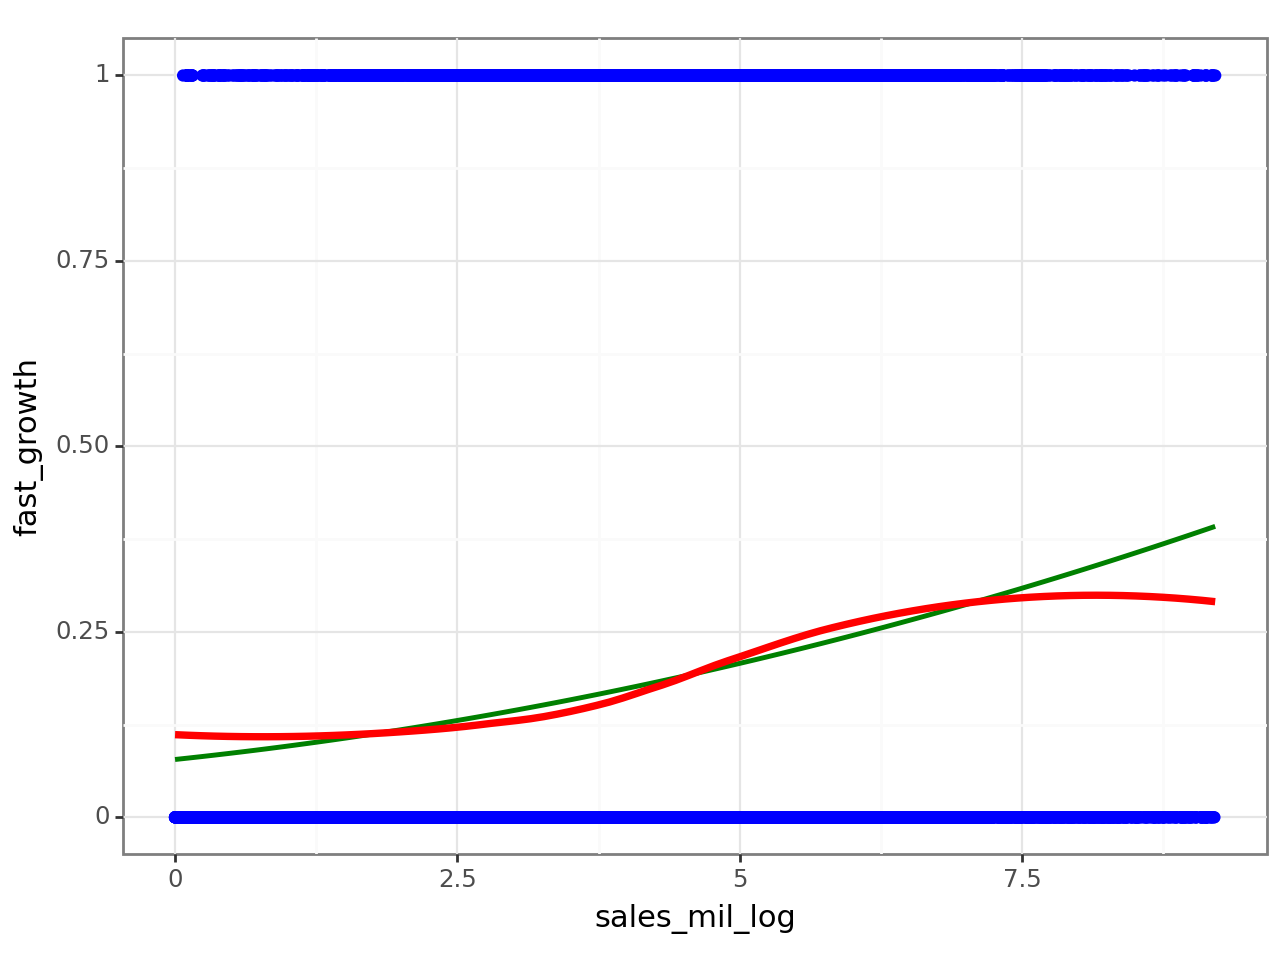

<Figure Size: (640 x 480)>

In [90]:
from plotnine import *
# from ggplot import ggplot
(
    ggplot(df_2012, aes(x="sales_mil_log", y="fast_growth"))
    + geom_point(color='blue')
    + geom_smooth(method="lm", formula="y ~ x + I(x**2)", color="green", se=False)
    + geom_smooth(method="loess", color="red", se=False, size=1.5, span=0.9)
    + labs(x="sales_mil_log", y="fast_growth")
    + theme_bw()
)

c:\Users\PA\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1942 rows containing missing values.


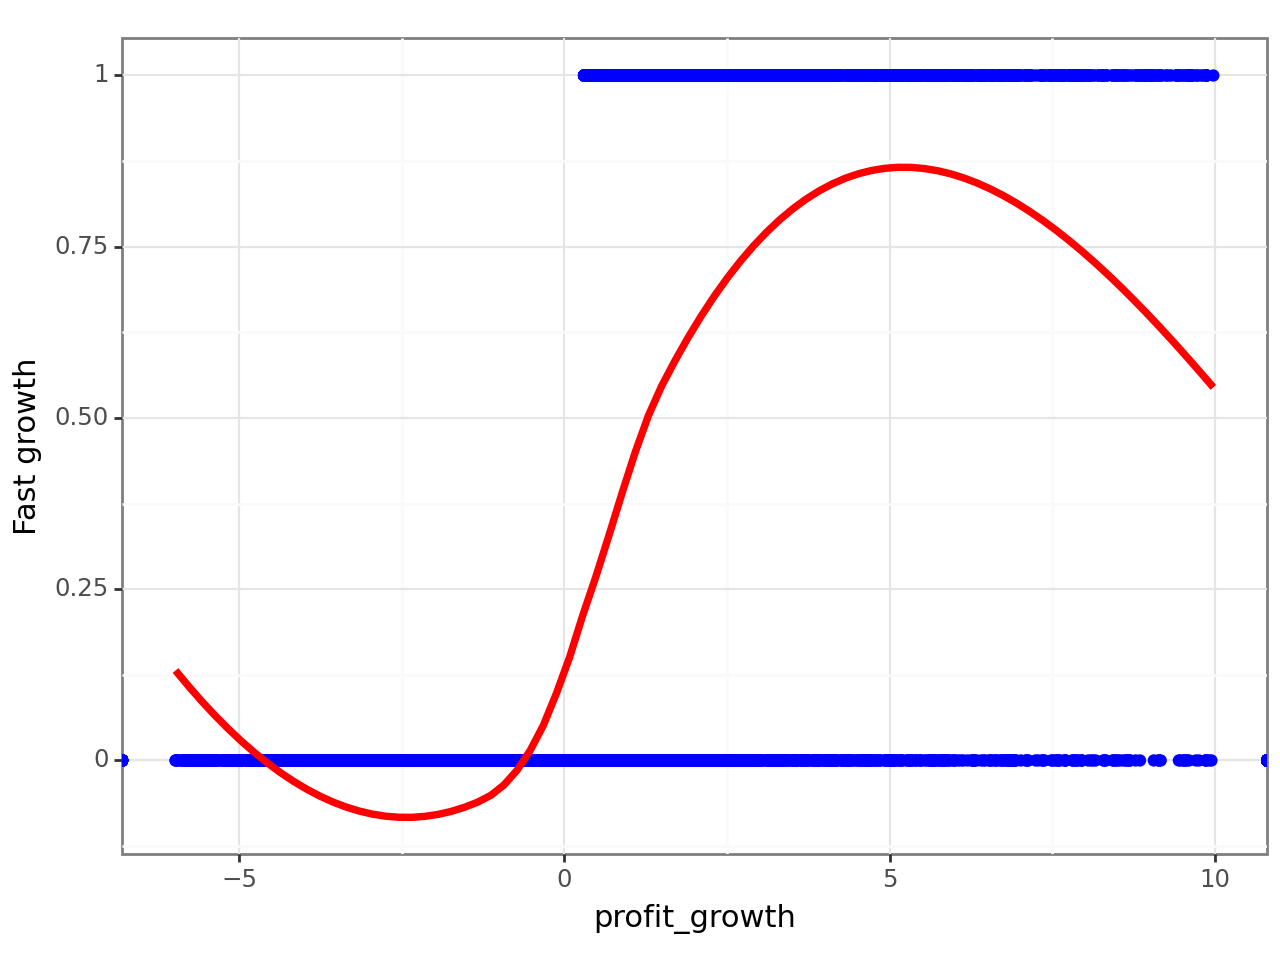

<Figure Size: (640 x 480)>

In [102]:
import statsmodels.formula.api as smf
from sympy import sequence
(
    ggplot(df_2012, aes(x="profit_growth", y="fast_growth"))
    + geom_point(color="blue")
    + geom_smooth(method="loess", color='red', se=False, size=1.5, span=0.9)
    + labs(x="profit_growth", y="Fast growth")
    + scale_x_continuous(limits=(-6, 10))
    + theme_bw()
)